# The Genesis
<b>Time Series and its History and how pivotal has it been in the answering very contoversoial questions - </b>
    
Time series has been there for ages, from Bybolnians of Mesopotamia, recording weather conditions, daily commodity prices and river levels against dates with some important events in their <i>Astronomical Diaries</i>.

It is through these records that we know the date of demise of Alexander - The Great's in Babylon, 323 BC

<img src="../Materials/Astronomical Diary - Alexander the Greats Death.png" width="200" height="200">

But after <b>The Great Library of Alexandria</b> was burnt in 272 AD, there is no complete records of that data left anymore sadly!

One of the oldest Time Series that we do have recorded data of is of <b><i>Mars Declination</i></b> angles by <b>Tycho Brahe</b>, which, to the best of my knowledge consititues as <i>One of the Oldest Time Series</i> that we have a record of.


<img src="../Materials/Tycho Brahe - Mars Declination Angle.gif" width="500" height="200">

[Tycho Brahe - Mars Declination Ang.gif] - Wayne Pafko, http://www.pafko.com/tycho/observe.html

[Astronomical Diary - Alexander the Greats Death.png] - https://www.britishmuseum.org/collection/object/W_1881-0706-403


# Imports

In [1]:
# Data Wrangling
import pandas as pd
import numpy as np

# For Date-Time Manipulation
from datetime import datetime, timedelta

# For Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.notebook import tqdm

# System Libraries
import os

# Path Declaration & Variable Initialisation

In [2]:
root_path = '../'
raw_datapath = root_path+'Raw Data/'
prepared_datapath = root_path+'Prepared Data/'
os.makedirs(prepared_datapath, exist_ok=True)

# Tycho Brahe Mars Declination Understandings
tmars_datapath = raw_datapath+'tycho_mars_declination_data.xls'
# Collected NASA Data from : https://ssd.jpl.nasa.gov/horizons.cgi#top
tmars_nasadata = raw_datapath+'horizons_results.txt'

# Visulaisation Variables
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (25,7)

# Tycho Brahe - Mars Declination

What is a declination angle between planets?

<img src="../Materials/retrogrademotion.gif" width="500" height="200">

[retrogrademotion.gif] - https://my.vanderbilt.edu/astro201solarsys/page/39/

Declination Angle - Angle of observation for an observer standing on the surface of the earth to the green colored pane as shown in the gif.



In [3]:
tmars_data = pd.read_excel(tmars_datapath, index_col=0, skiprows=list(range(5)))
print('Total Number of Data Points : ', tmars_data.shape[0])
tmars_data.head()

Total Number of Data Points :  923


,Year,Day,Time,Quote,Volume,Page,Unnamed: 7,Year.1,Month,Day.1,Day (adj),Hour,Min,Days since 1 AD,Date,Unnamed: 16,Dec (deg),Dec (min),Dec (sec),Declination
NaN,1582,"DIE 12 NOUEMBRIS, MANE.",NaN,Declinatio [MS] 23 7 B,10,174,NaN,1582,11,12,22,NaN,NaN,578150.500000,1582.889802,1,23,7,NaN,23.116667
NaN,1582,DIE 30 DECEMBRIS,NaN,Afc. R. [MS] 107o 56' Declin. 26o 36' B.,10,197,NaN,1582,12,30,40,NaN,NaN,578198.500000,1583.021218,1,26,56,NaN,26.933333
NaN,1582,DIE 27 DECEMBRIS,NaN,declinatio [MS] 26o 22 1/3' et Afcenfio Recta...,10,200,NaN,1582,12,27,37,NaN,NaN,578195.500000,1583.013005,1,26,22,20.0,26.372222
NaN,1583,"DIE 18 JANUARIJ, VESPERI.",NaN,Declinatio 27 18 minus bona,10,244,NaN,1583,1,18,28,NaN,NaN,578217.500000,1583.073238,1,27,18,NaN,27.300000
NaN,1584,"DIE 13 NOUEMBRIS, A.M.",H.13 26 P.M.,Declinatio [MS] B. 15 54,10,321,NaN,1584,11,13,23,13.0,26.0,578883.059722,1584.895441,1,15,54,NaN,15.900000


In [4]:
tmars_data = tmars_data.dropna(axis=1, how='all')
tmars_data = tmars_data.reset_index().drop('index', axis=1)
tmars_data = tmars_data[['Year.1', 'Month', 'Day.1', 'Declination']]
tmars_data.columns = ['Year', 'Month', 'Day', 'Declination']
tmars_data['Date'] = tmars_data.apply(lambda x : datetime(int(x.Year), int(x.Month), int(x.Day)), axis=1)
tmars_data = tmars_data.set_index('Date')
tmars_data = tmars_data.drop(['Year', 'Month', 'Day'], axis=1)
tmars_data.sort_index(inplace=True)
print('Total Number of Data Points : ', tmars_data.shape[0])
tmars_data.head()

Total Number of Data Points :  923


,Declination
Date,
1582-11-12 00:00:00,23.116667
1582-12-27 00:00:00,26.372222
1582-12-30 00:00:00,26.933333
1583-01-18 00:00:00,27.300000
1584-11-13 00:00:00,15.900000


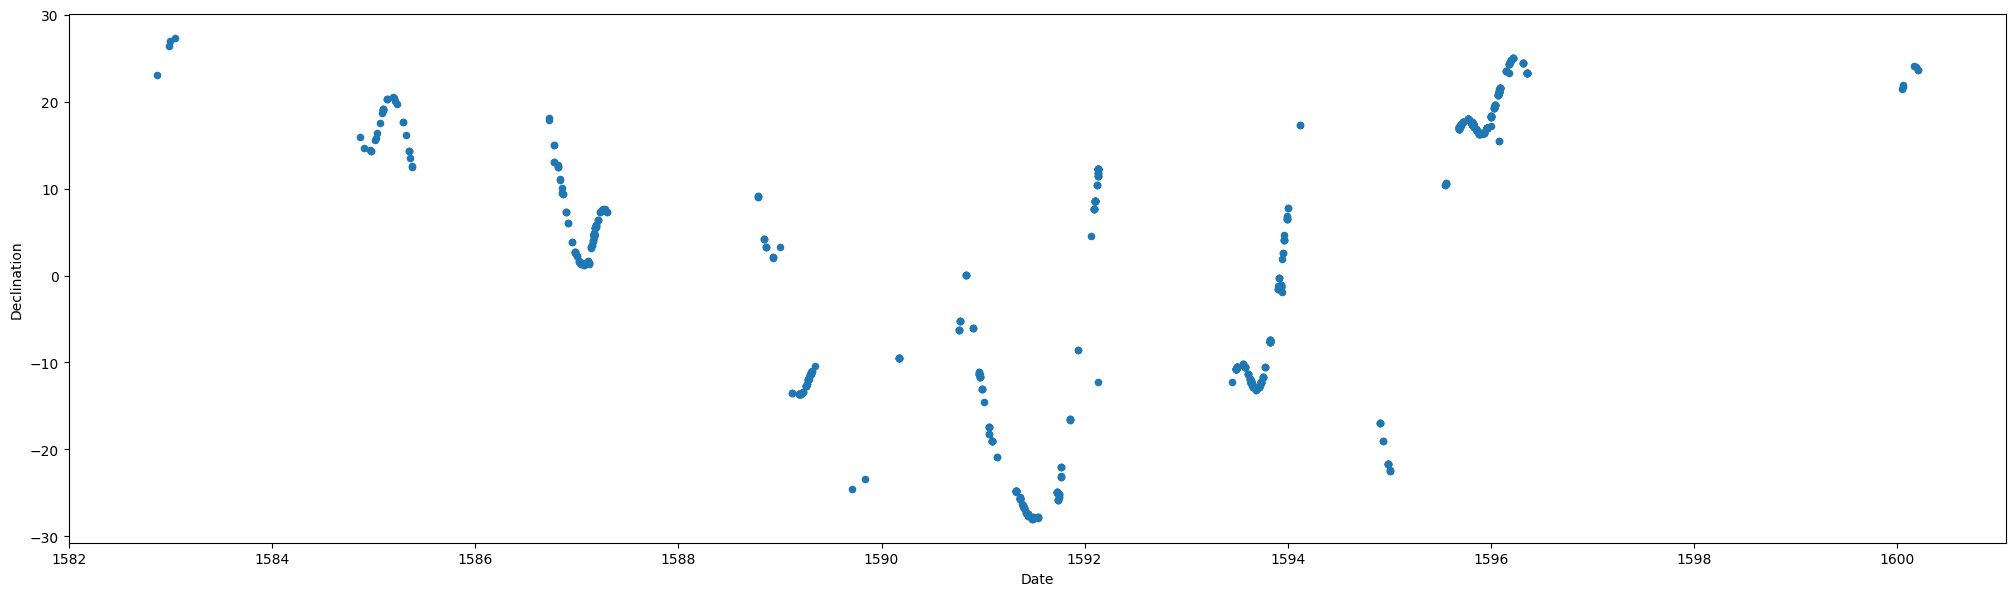

In [5]:
_=tmars_data.reset_index().plot(kind='scatter', x='Date', y='Declination')

In [6]:
tmars_data.index.value_counts().head()

1595-10-27 00:00:00    49
1595-10-25 00:00:00    34
1595-10-28 00:00:00    22
1595-12-18 00:00:00    21
1595-10-26 00:00:00    21
Name: Date, dtype: int64

Total Number of Data Points :  7033


,Declination
1582-11-12 00:00:00,23.116667
1582-11-13 00:00:00,NaN
1582-11-14 00:00:00,NaN
1582-11-15 00:00:00,NaN
1582-11-16 00:00:00,NaN


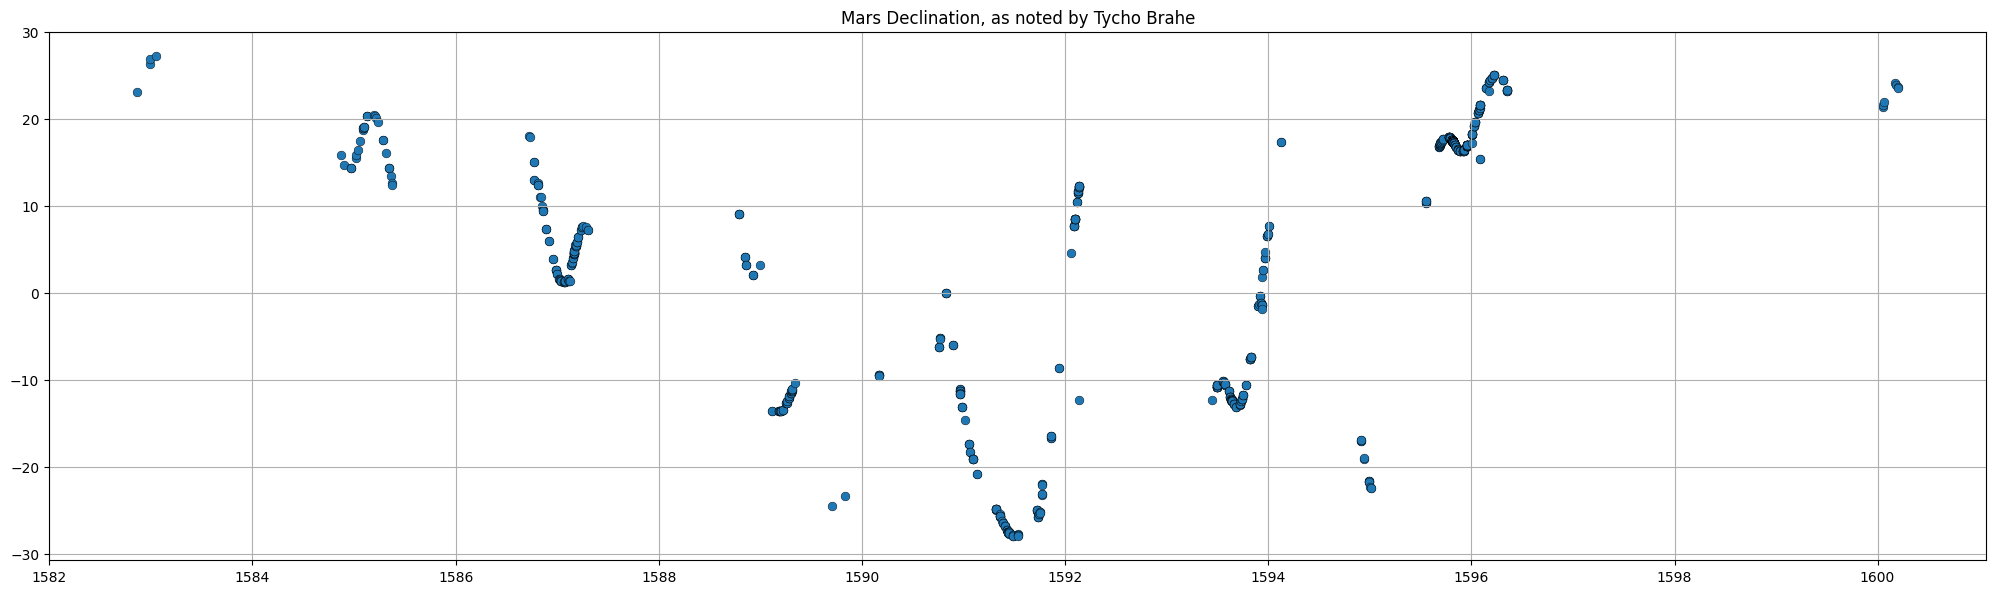

In [7]:
# Get all the days in between
total_daydiff = (tmars_data.index.max() - tmars_data.index.min()).days
alldays = [tmars_data.index.min()+timedelta(days=eday) for eday in range(total_daydiff)]
tempdf = pd.DataFrame(index=alldays)
tmars_data = pd.merge(tempdf, tmars_data, left_index=True, right_index=True, how='outer')

# Merge the original dataset and the All-Daterange df
tmars_data = pd.merge(tempdf, tmars_data, left_index=True, right_index=True, how='outer')
print('Total Number of Data Points : ', tmars_data.shape[0])
# Plotting
# _=tmars_data.reset_index().plot(kind='scatter', x='index', y='Declination')
_=plt.scatter(tmars_data.index, tmars_data.Declination, s=40, edgecolor='k', linewidth=.3)
_=plt.title('Mars Declination, as noted by Tycho Brahe')
_=plt.grid()
tmars_data.head()


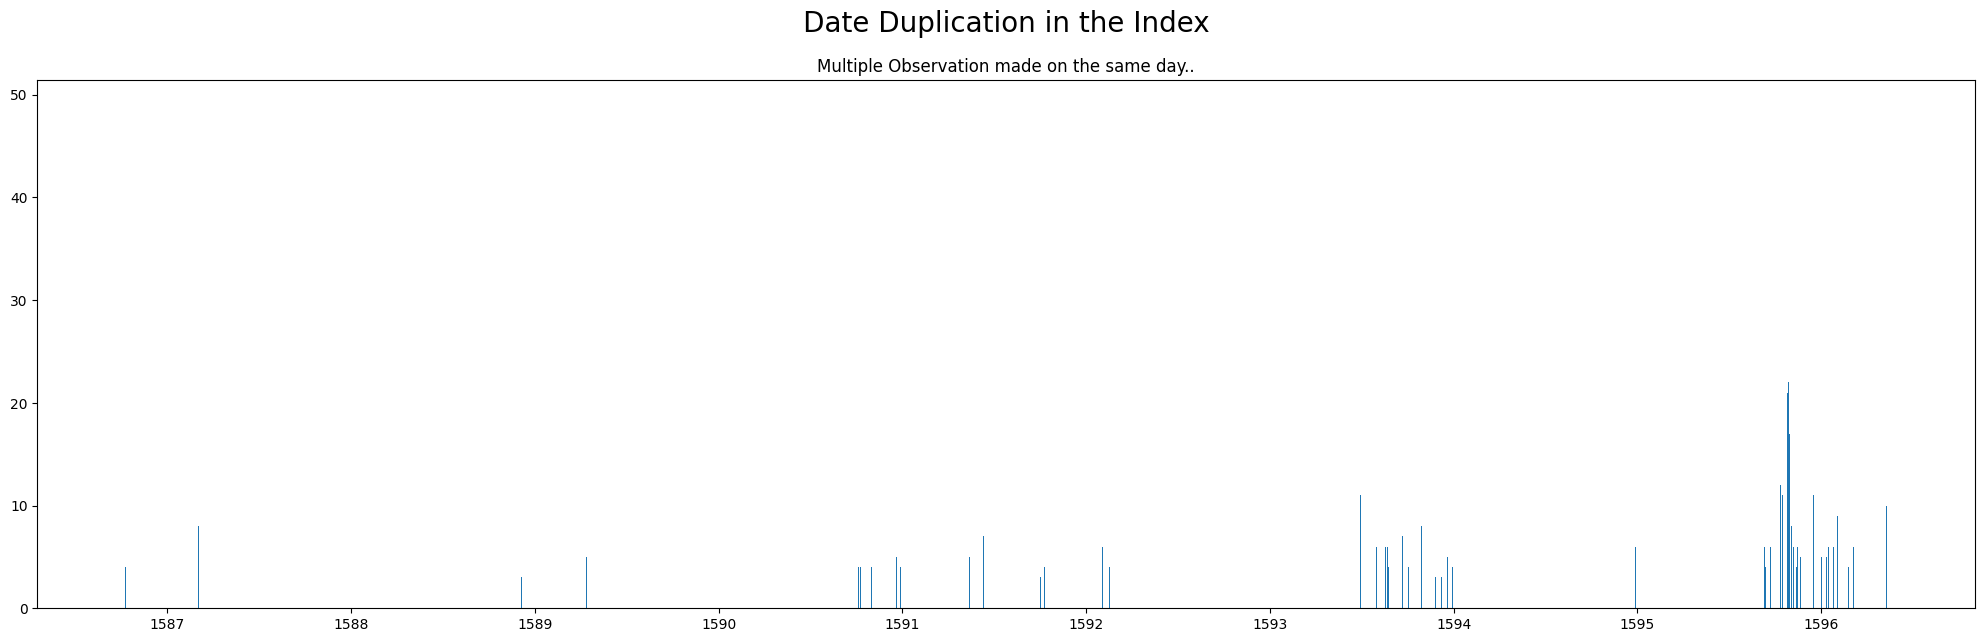

In [8]:
pltdata = tmars_data.index.value_counts().head(100)
_=plt.bar(pltdata.index, pltdata.values, 1)
_=plt.suptitle('       Date Duplication in the Index', fontsize=20)
_=plt.title('Multiple Observation made on the same day..')

Total Number of Data Points :  6335


,Declination
1582-11-12 00:00:00,23.116667
1582-12-27 00:00:00,26.372222
1582-12-30 00:00:00,26.933333
1583-01-18 00:00:00,27.300000
1584-11-13 00:00:00,15.900000


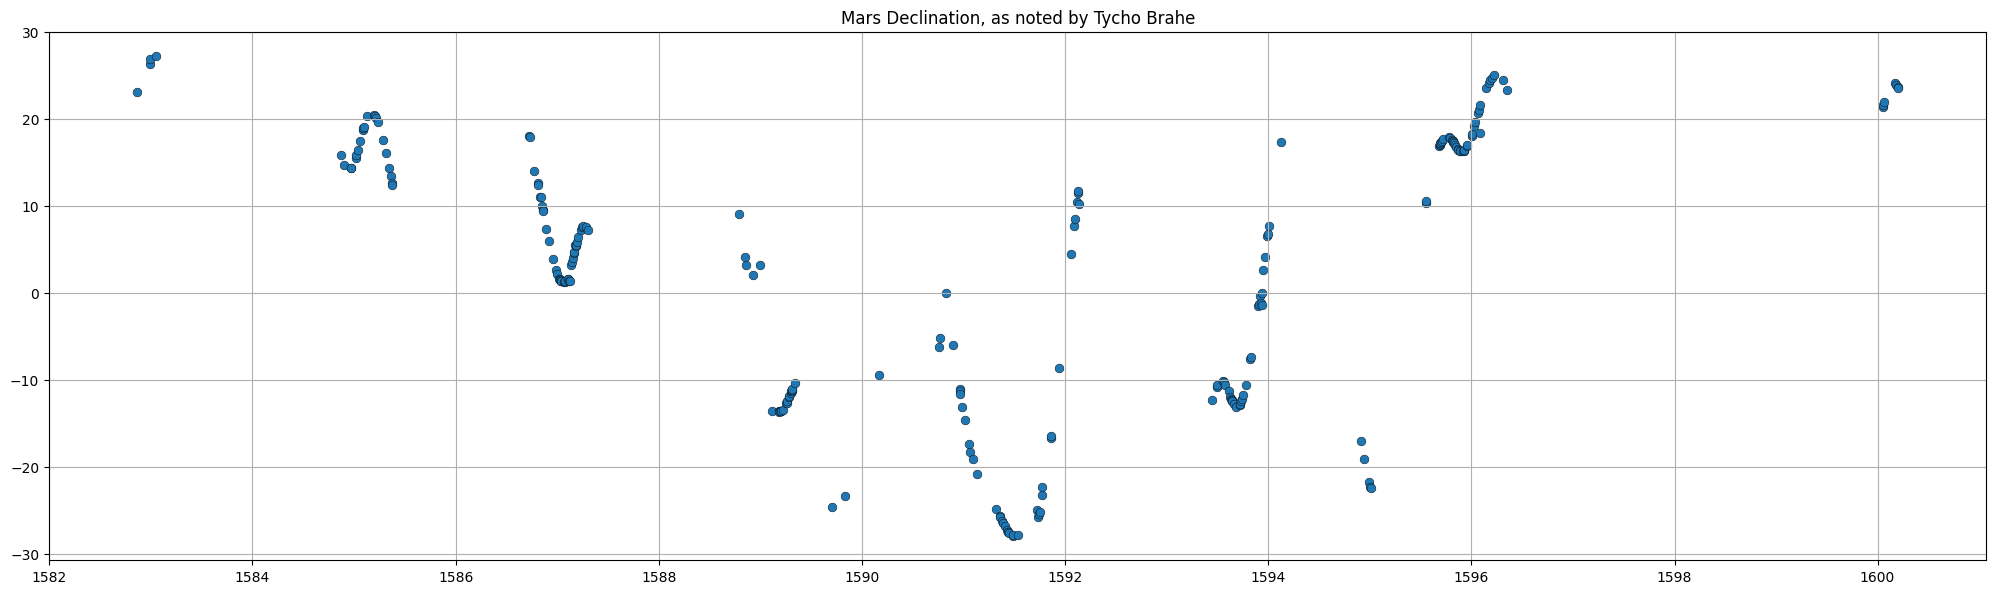

In [9]:
# Group the DataFrame by the Index Dates and then Make the plot
tmars_data = tmars_data.groupby(tmars_data.index).mean()
print('Total Number of Data Points : ', tmars_data.shape[0])
# Plotting
_=plt.scatter(tmars_data.index, tmars_data.Declination, s=40, edgecolor='k', linewidth=.3)
_=plt.title('Mars Declination, as noted by Tycho Brahe')
_=plt.grid()
tmars_data.dropna().head()

In [10]:
# Comparing the observations to the JPL Horizons Data
flines = []
with open(tmars_nasadata, 'r') as f:
    flines = f.read().splitlines()

mars_nasadata = pd.DataFrame(columns=['Declination'])
mars_nasadata.index.name = 'Date'
table_start = False

for eline in tqdm(flines):
    _splits = eline.split('  ')
    try:
        if table_start:
            _date = _splits[0].strip().split(' ')[0].strip()
            _date = datetime.strptime(_date, '%Y-%b-%d')
            mars_nasadata.loc[_date, 'Declination'] = " ".join(_splits[2].strip().split(' ')[-3:])
        if eline == '$$SOE':
            table_start = True
    except:
        pass

# Prepare Mars Declination Angle
def get_declination(x):
    _splits = x['Declination'].split(' ')
    res = float(_splits[0][1:])+float(_splits[1])/(60)+float(_splits[2])/(60**2)
    if _splits[0][0] == '-':
        res *= -1 
    return res

mars_nasadata.Declination = mars_nasadata.apply(lambda x : get_declination(x), axis=1)
mars_nasadata.to_csv(prepared_datapath+'mars_jpldata.csv')
mars_nasadata.head()

,Declination
Date,
1600-01-02 00:00:00,17.549833
1600-01-09 00:00:00,18.306750
1600-01-16 00:00:00,19.200167
1600-01-23 00:00:00,20.145139
1600-01-30 00:00:00,21.041389


<AxesSubplot:xlabel='Date'>

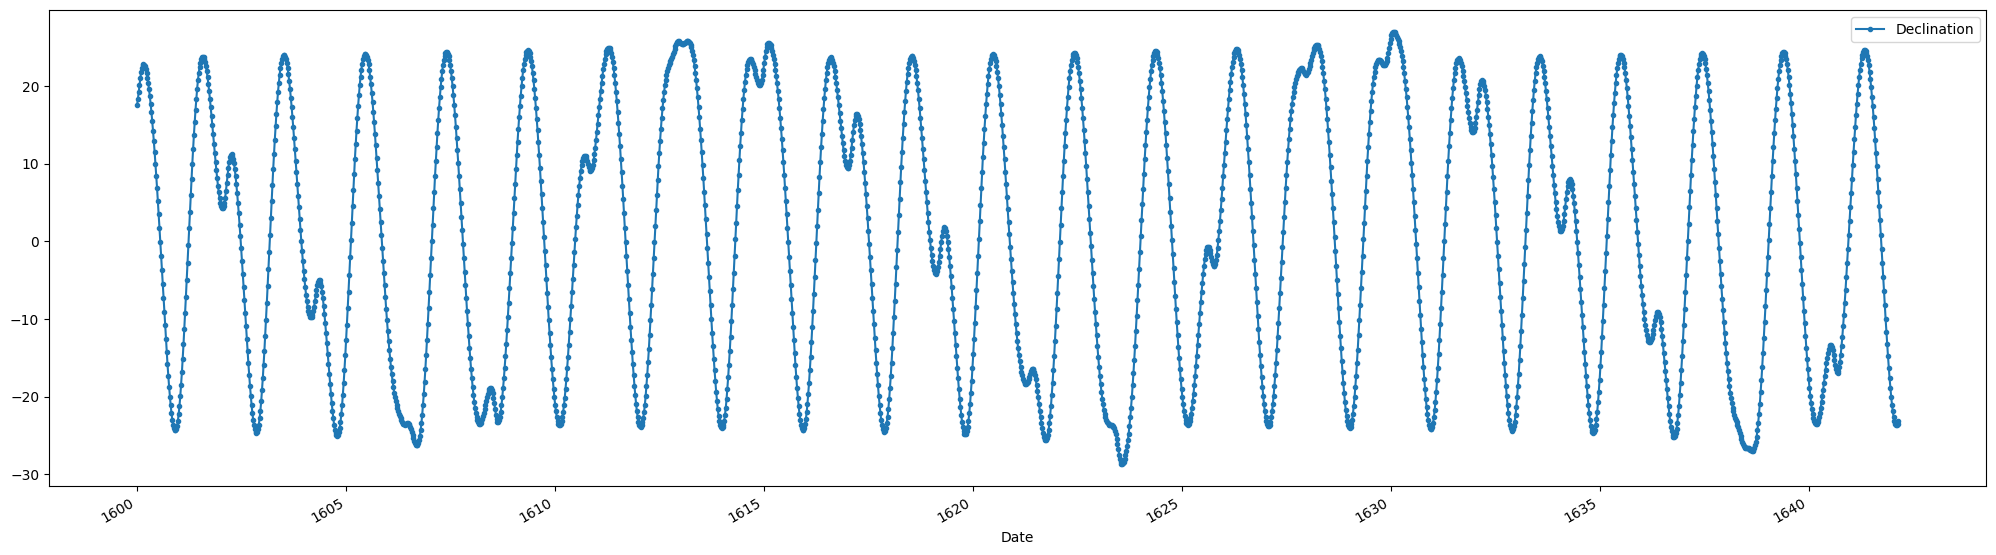

In [11]:
mars_nasadata.head(2200).plot(marker='o', markersize=3)

# Random Testing Space

In [ ]:
import tsmad as tmd
import pandas as pd
from tqdm.notebook import tqdm


raw_datapath = '../../Raw Data/'
stocks_datapath = raw_datapath+'TimeSeriesdata-BD.csv'
temperature_datapath = raw_datapath+'TimeSeriesdata-MS.csv'
df = pd.read_csv(stocks_datapath, index_col=0)
df.head()

In [ ]:

processedDf = pd.DataFrame()
for egidx, eg in tqdm(df.groupby('Name')):
    tdf = pd.DataFrame(index=pd.date_range(eg.index.min(), eg.index.max(), freq='B').astype(str))
    tdf = pd.merge(eg, tdf, left_index=True, right_index=True, how='outer')
    tdf.Name = tdf.Name.ffill()
    processedDf = pd.concat([processedDf, tdf])


In [ ]:
tboard = tmd.TsmadBoard(tsdata=tempdf, data_desc = 'Stocks Data',
                        target_columns = ['close'],
                        categorical_columns = ['Name'],
                        dt_format = '%Y-%m-%d',
                        dt_freq = 'B',
                        freq_conv_agg = 'mean')

In [ ]:
tboard.get_board()

In [ ]:
tempdf = processedDf.copy()

In [54]:
# import tsmad as tmd
# import pandas as pd
# from tqdm.notebook import tqdm
# tempdf = pd.read_csv('a.csv', index_col=0, parse_dates=True)

# tboard = tmd.TsmadBoard(tsdata=tempdf, data_desc = 'Stocks Data',
#                         target_columns = ['close'],
#                         categorical_columns = ['Name'],
#                         dt_format = '%Y-%m-%d',
#                         dt_freq = 'B',
#                         freq_conv_agg = 'mean')
# tboard.get_board()

In [25]:
pd.Timedelta('1 day 99ms')

Timedelta('1 days 00:00:00.099000')

In [29]:
np.array([1,2,3,4])*3

array([ 3,  6,  9, 12])